In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.image as mpimg
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import shutil

In [158]:
#Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec) 
# basal cell carcinoma (bcc)
# benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl)
# dermatofibroma (df)
# melanoma (mel)
# melanocytic nevi (nv) 
# vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc)

lesion_types = {
    'akiec': 'Actinic keratoses',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis-like lesions ',
    'df': 'Dermatofibroma',
    'mel': 'Melanoma',
     'nv': 'Melanocytic nevi',
    'vasc': 'Vascular lesions'
}

In [159]:
skin_df = pd.read_csv("skin.csv")

In [160]:
skin_df.head()

,Unnamed: 0,lesion_id,image_id,dx_type,age,sex,localization,image_path,dx,target
0,0,HAM_0000118,ISIC_0027419,histo,80.0,male,scalp,HAM10000_images_part_1\ISIC_0027419.jpg,bkl,2
1,1,HAM_0000118,ISIC_0025030,histo,80.0,male,scalp,HAM10000_images_part_1\ISIC_0025030.jpg,bkl,2
2,2,HAM_0002730,ISIC_0026769,histo,80.0,male,scalp,HAM10000_images_part_1\ISIC_0026769.jpg,bkl,2
3,3,HAM_0002730,ISIC_0025661,histo,80.0,male,scalp,HAM10000_images_part_1\ISIC_0025661.jpg,bkl,2
4,4,HAM_0001466,ISIC_0031633,histo,75.0,male,ear,HAM10000_images_part_2\ISIC_0031633.jpg,bkl,2


In [161]:
skin_df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [162]:

# lesion_types = {
#     'akiec': 'Actinic keratoses',
#     'bcc': 'Basal cell carcinoma',
#     'bkl': 'Benign keratosis-like lesions ',
#     'df': 'Dermatofibroma',
#     'mel': 'Melanoma',
#      'nv': 'Melanocytic nevi',
#     'vasc': 'Vascular lesions'
# }
# melanocytic nevi                  883
# Benign keratosis-like lesions      88
# dermatofibroma                     46
# Basal cell carcinoma               35
# Actinic keratoses                  30
# Vascular lesions                   13
# Dermatofibroma                      8
# [15,10,5,50,0,40,5]
# data_aug_rate = [['akiec',20], ['bcc',15],[ 'bkl',5], ['df',40], ['mel',8], ['nv',0], ['vasc',30]]
# print(data_aug_rate[0][1])
# #print([skin_df.loc[skin_df['dx'] == data_aug_rate[0][0],:]]*(data_aug_rate[0][1]-1))
# for i in range(7):
#     if data_aug_rate[i][1]:
#         skin_df=skin_df.append([skin_df.loc[skin_df['dx'] == data_aug_rate[i][0],:]]*(data_aug_rate[i][1]-1), ignore_index=True)
# skin_df['dx'].value_counts()

In [164]:

train,test=train_test_split(skin_df, test_size=0.1, random_state=42)

In [165]:
train,val=train_test_split(train, test_size=0.1, random_state=42)

In [166]:
test.shape

(1002, 10)

In [167]:
val.shape

(902, 10)

In [168]:
train.shape

(8111, 10)

In [169]:
train['dx'].value_counts()

nv       5465
mel       894
bkl       879
bcc       417
akiec     248
vasc      115
df         93
Name: dx, dtype: int64

[Text(0, 0.5, 'Number of samples in each type'),
 Text(0.5, 0, 'Type of lesion'),
 Text(0.5, 1.0, 'Number of samples of each lesion type')]

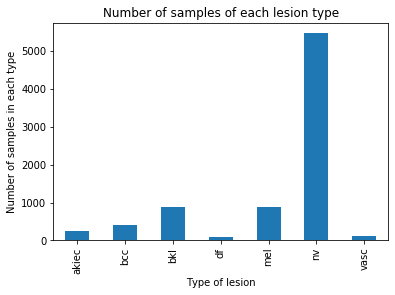

In [170]:
train.groupby(['dx'])['lesion_id'].count().plot(kind='bar').set(title='Number of samples of each lesion type',xlabel='Type of lesion',ylabel='Number of samples in each type')

In [171]:
#skin_df.loc['HAM10000_images_part_1\ISIC_0027419.jpg']
skin_df.loc[skin_df['image_id'] == 'ISIC_0027419']['target'].mode()

0    2
dtype: int64

In [172]:
os.mkdir('train')
os.mkdir('test')
os.mkdir('val')

In [173]:
nv = os.path.join('train', 'nv')
os.mkdir(nv)
mel = os.path.join('train', 'mel')
os.mkdir(mel)
bkl = os.path.join('train', 'bkl')
os.mkdir(bkl)
bcc = os.path.join('train', 'bcc')
os.mkdir(bcc)
akiec = os.path.join('train', 'akiec')
os.mkdir(akiec)
vasc = os.path.join('train', 'vasc')
os.mkdir(vasc)
df = os.path.join('train', 'df')
os.mkdir(df)

In [174]:

folder_1 = os.listdir('HAM10000_images_part_1')
folder_2 = os.listdir('HAM10000_images_part_2')


train_list = list(train['image_path'])
train_list_target = list(train['dx'])
val_list = list(val['image_path'])
test_list = list(test['image_path'])



In [175]:
for i in range(len(train_list)):
    
    fname = train_list[i] 
    label = train_list_target[i] #skin_df.loc[skin_df['image_id'] == 'ISIC_0027419']['dx'].mode()
    dst = os.path.join('train', label,os.path.split(fname)[1])
    shutil.copyfile(train_list[i] , dst)


In [176]:
for i in range(len(val_list)):
    dest= os.path.join('val', os.path.split(val_list[i])[1] )
    shutil.copyfile(val_list[i] , dest)

In [177]:

for i in range(len(test_list)):
    dest= os.path.join('test', os.path.split(test_list[i])[1] )
    shutil.copyfile(test_list[i] , dest)

In [178]:
train_list[0]

'HAM10000_images_part_1\\ISIC_0024581.jpg'

In [179]:
train_list_target[0]

'bkl'

In [180]:
os.path.join('train', train_list_target[0])

'train\\bkl'

In [181]:
shutil.copyfile(val_list[0],os.path.join('val', os.path.split(val_list[0])[1] ))

'val\\ISIC_0029046.jpg'

In [182]:
os.path.split(train_list[0]
             )[0
              ]

'HAM10000_images_part_1'

In [183]:
des=os.path.join('train', train_list_target[0],os.path.split(train_list[0])[1])

In [184]:
len(train_list)

8111